In [1]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with zipfile.ZipFile('data/data-tx.csv.zip') as z:
    with z.open('data-tx.csv') as f:
        transfers = pd.read_csv(f,parse_dates=['createdAt'])

In [3]:
transfers.head()

,id,total,customerId,createdAt
0,29261,50000.0,5de2ffee6bad5850e5d3a0e3,2019-12-01 00:00:26.899000+00:00
1,29262,50000.0,5d76f219cc8ccc0047caba8c,2019-12-01 00:04:47.894000+00:00
2,29263,50000.0,5de304f06bad5850e5d3a269,2019-12-01 00:11:39.676000+00:00
3,29264,31000.0,5dd1628b3bea4b0060742232,2019-12-01 00:13:25.523000+00:00
4,29265,30000.0,5dd0adca3bea4b0060741da7,2019-12-01 00:13:57.747000+00:00


# Let's start by exploring the data we are given so we can have a general understanding of it.

## Q: What is the range of dates?
## A: From 2019-12-01 to 2020-10-03.

In [4]:
print(transfers['createdAt'].min())
print(transfers['createdAt'].max())

2019-12-01 00:00:26.899000+00:00
2020-10-03 23:26:44.277000+00:00


## Q: Number of transactions in the period?
## A: 230533

In [5]:
transfers.shape[0]

230533

## Q: How many unique clientes are there?
## A: 25785

In [6]:
len(transfers['customerId'].unique())

25785

## Q: What about the "id" column, is it just a series un correlative numbers?
## A: The "id" column doesn't follow a perfect correlative order, it breaks in some parts of its series. Don't use it as a proper id.

In [7]:
transfers['id'].unique()

array([ 29261,  29262,  29263, ..., 260200, 260201, 260202], dtype=int64)

In [8]:
len(transfers['id'].unique())

230533

In [9]:
transfers.shape[0]

230533

In [10]:
transfers['id'][0]

29261

In [11]:
transfers['id'][0]+len(transfers['id'].unique()-1)
### This number doesn't correspond to the last number of the series, so somehere in the time series the "id" column
### breaks its order

259794

In [12]:
disorder = []
for i in range(0,transfers.shape[0]):
    try:
        if transfers.loc[i,'id'] == transfers.loc[i+1,'id']-1:
            disorder_temp = 0
        else:
            disorder_temp = np.abs(transfers.loc[i,'id']-transfers.loc[i+1,'id']-1)
    except:
        disorder_temp = 0
    disorder.append(disorder_temp)
transfers['disorder'] = disorder

In [13]:
transfers[transfers['disorder']>0]

,id,total,customerId,createdAt,disorder
649,29910,180000.000000,5dd87a03c2faef00715be387,2019-12-03 13:40:39.841000+00:00,3
651,29911,30000.000000,5de66535da1f2d44672abd75,2019-12-03 13:41:48.922000+00:00,3
3814,33075,31000.000000,5c61eaaf5bde67001ff886d6,2019-12-13 18:57:53.269000+00:00,4
3816,33077,230000.000000,5de581086ec8e5008014b7ee,2019-12-13 19:05:46.168000+00:00,3
3817,33079,230000.000000,5de581086ec8e5008014b7ee,2019-12-13 19:05:46.170000+00:00,2
...,...,...,...,...,...
227009,256678,110000.000000,5df7b29919d2e2006bf87f7f,2020-09-30 17:17:52.165000+00:00,3
227057,256727,0.001114,5eee0a8546429c0087c6de59,2020-09-30 18:05:12.747000+00:00,3
227059,256728,50000.000000,5de190059cd7710072f6963f,2020-09-30 18:06:57.715000+00:00,3
227712,257382,0.000474,5e014ae4e745de6c12bfc81d,2020-10-01 13:31:17.505000+00:00,3


In [14]:
transfers[transfers['disorder']==np.max(transfers['disorder'])]

,id,total,customerId,createdAt,disorder
215909,233633,20000.0,5c9bb29f64abb0001f4825f7,2020-09-16 19:09:10.845000+00:00,11948


In [15]:
transfers.iloc[215905:215912,:]

,id,total,customerId,createdAt,disorder
215905,245576,50000.0,5eff3f9930cd2900749cd97f,2020-09-16 21:23:13.682000+00:00,0
215906,245577,20000.0,5f5ce87836bf820081541507,2020-09-16 21:24:04.549000+00:00,0
215907,245578,200000.0,5e4444dc839c18006d7f1689,2020-09-16 21:24:46.464000+00:00,0
215908,245579,26000.0,5e8f1a229ffa6800525ad1fa,2020-09-16 21:25:43.018000+00:00,11945
215909,233633,20000.0,5c9bb29f64abb0001f4825f7,2020-09-16 19:09:10.845000+00:00,11948
215910,245580,20000.0,5e7500d076c9610ccbeb27d8,2020-09-16 21:26:33.126000+00:00,0
215911,245581,30000.0,5f593b5f23b4d8005ef87b20,2020-09-16 21:27:34.075000+00:00,0


In [16]:
transfers.iloc[647:655,:]

,id,total,customerId,createdAt,disorder
647,29908,30000.0,5d34931d0fff9300496d49ba,2019-12-03 13:33:21.310000+00:00,0
648,29909,110000.0,5dd40cf27b05a50067742668,2019-12-03 13:33:53.127000+00:00,0
649,29910,180000.0,5dd87a03c2faef00715be387,2019-12-03 13:40:39.841000+00:00,3
650,29912,37000.0,5db6e66f51d9e70079a4ee58,2019-12-03 13:41:48.921000+00:00,0
651,29911,30000.0,5de66535da1f2d44672abd75,2019-12-03 13:41:48.922000+00:00,3
652,29913,150000.0,5dc080eb91396f008728a5ad,2019-12-03 13:45:43.045000+00:00,0
653,29914,50000.0,5dd5ba227249350064404648,2019-12-03 13:51:39.044000+00:00,0
654,29915,39000.0,5d71dec2482db6004a2843e9,2019-12-03 13:52:37.476000+00:00,0


In [17]:
transfers.iloc[3813:3820,:]

,id,total,customerId,createdAt,disorder
3813,33074,499999.999,5dd31d7e9110be0052d7119e,2019-12-13 18:56:55.206000+00:00,0
3814,33075,31000.000,5c61eaaf5bde67001ff886d6,2019-12-13 18:57:53.269000+00:00,4
3815,33078,230000.000,5de581086ec8e5008014b7ee,2019-12-13 19:05:46.168000+00:00,0
3816,33077,230000.000,5de581086ec8e5008014b7ee,2019-12-13 19:05:46.168000+00:00,3
3817,33079,230000.000,5de581086ec8e5008014b7ee,2019-12-13 19:05:46.170000+00:00,2
3818,33076,230000.000,5de581086ec8e5008014b7ee,2019-12-13 19:05:46.168000+00:00,5
3819,33080,230000.000,5de581086ec8e5008014b7ee,2019-12-13 19:05:51.045000+00:00,0


## Q: Are there outliers in the amount transfered?
## A1: Yes, 7.5% of transactions are outliers. <br> A2: There are only big outliers (< percentile 75th + (IQR * 1.5 ))

In [18]:
transfers['total'].value_counts()

50000.000000     35850
20000.000000     35119
100000.000000    21785
30000.000000     18371
40000.000000     10389
                 ...  
0.002352             1
0.001557             1
0.000620             1
0.008822             1
0.000825             1
Name: total, Length: 26708, dtype: int64

In [19]:
transfers['total'].describe()

count    2.305330e+05
mean     7.013176e+04
std      9.515972e+04
min      3.104500e-04
25%      2.200000e+04
50%      5.000000e+04
75%      8.473000e+04
max      1.900000e+06
Name: total, dtype: float64

In [20]:
IQR = transfers['total'].describe()['75%']-transfers['total'].describe()['25%']
IQR

62730.0

In [21]:
transfers_noOutliers = transfers[(transfers['total']>transfers['total'].describe()['25%']-IQR*1.5)&
                                (transfers['total']<transfers['total'].describe()['75%']+IQR*1.5)]
transfers_noOutliers.head()

,id,total,customerId,createdAt,disorder
0,29261,50000.0,5de2ffee6bad5850e5d3a0e3,2019-12-01 00:00:26.899000+00:00,0
1,29262,50000.0,5d76f219cc8ccc0047caba8c,2019-12-01 00:04:47.894000+00:00,0
2,29263,50000.0,5de304f06bad5850e5d3a269,2019-12-01 00:11:39.676000+00:00,0
3,29264,31000.0,5dd1628b3bea4b0060742232,2019-12-01 00:13:25.523000+00:00,0
4,29265,30000.0,5dd0adca3bea4b0060741da7,2019-12-01 00:13:57.747000+00:00,0


In [22]:
(1-transfers_noOutliers.shape[0]/transfers.shape[0])*100

7.52213349064993

In [23]:
transfers_outliers = transfers[(transfers['total']>=transfers['total'].describe()['75%']+IQR*1.5)|
                              (transfers['total']<=transfers['total'].describe()['25%']-IQR*1.5)]
transfers_outliers.head()

,id,total,customerId,createdAt,disorder
36,29297,300000.0,5dcef97598cbdd007c27c952,2019-12-01 03:25:14.913000+00:00,0
42,29303,200000.0,5de356341a61960079e2ec1a,2019-12-01 06:02:02.731000+00:00,0
44,29305,200000.0,5db5df4973253300668003fe,2019-12-01 11:50:47.458000+00:00,0
50,29311,300000.0,5dc61a11b3090a008747d236,2019-12-01 13:04:17.167000+00:00,0
61,29322,200000.0,5db5df4973253300668003fe,2019-12-01 14:38:41.125000+00:00,0


In [24]:
transfers_outliers.shape[0]/transfers.shape[0]*100

7.52213349064993

In [25]:
transfers_outliers['total'].describe()

count    1.734100e+04
mean     3.241555e+05
std      1.844711e+05
min      1.790000e+05
25%      2.000000e+05
50%      2.500000e+05
75%      3.628000e+05
max      1.900000e+06
Name: total, dtype: float64

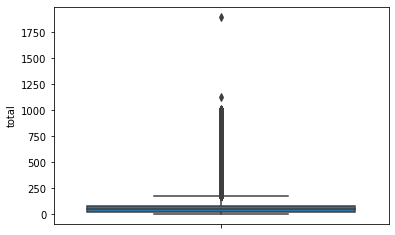

In [26]:
sns.boxplot(y=transfers['total']/1000,)
plt.show()

## Q: Can we identify heavy users?
## A1: Yes, 0.18% of clients make 20% of the total number of transfers.
## A2: 1% of clients make 20% of the total amount transfered. In fact, 80% of  the total amount transfered is made by 20% of clients.

In [27]:
### transfer count

In [28]:
transfers.groupby('customerId').agg('count')['total'].sort_values(ascending=False)

customerId
5e1bb63ca7f353007914155f    978
5e7a6d46d252e432e500df0f    787
5e19e338580d530056bdcd03    620
5e233730797b000052a4ddfe    574
5e2b4d67bf3b7a00603e48d9    402
                           ... 
5ea60f952ab53a00612e655b      1
5ea60132c6179f007521d52a      1
5ea5fad3e5aa7d007cb358b8      1
5ea5f9d78862e700831f76bd      1
5e98b949bc66360060a43e5a      1
Name: total, Length: 25785, dtype: int64

In [29]:
(transfers.groupby('customerId').agg('count')['total'].sort_values(ascending=False)).head(476)

customerId
5e1bb63ca7f353007914155f    978
5e7a6d46d252e432e500df0f    787
5e19e338580d530056bdcd03    620
5e233730797b000052a4ddfe    574
5e2b4d67bf3b7a00603e48d9    402
                           ... 
5ddc391ff0243900788eec9a     59
5e111254c19d0e0021f817a0     59
5e75bfbae63aa6469bf720a6     58
5df0df22a69a6b007511c04f     58
5e855ba90a10510067ea9bf2     58
Name: total, Length: 476, dtype: int64

In [30]:
(transfers.groupby('customerId').agg('count')['total'].sort_values(ascending=False).cumsum()/transfers.shape[0]*100).head(5157)

customerId
5e1bb63ca7f353007914155f     0.424234
5e7a6d46d252e432e500df0f     0.765617
5e19e338580d530056bdcd03     1.034559
5e233730797b000052a4ddfe     1.283547
5e2b4d67bf3b7a00603e48d9     1.457926
                              ...    
5dfd2e0bf4ba0a005297170b    70.558228
5e96fe4c4417560076ad89ca    70.563433
5ed6ac520c02ac2beb3bee65    70.568639
5d56ca706406c6004a184123    70.573844
5f008eb4cd50a20059cdfd42    70.579049
Name: total, Length: 5157, dtype: float64

In [31]:
len(transfers['customerId'].unique())

25785

In [32]:
7319/len(transfers['customerId'].unique())*100
### 28.4% of clientes (476 clients) make 80% of the total number of trnasfers

28.384719798332362

In [33]:
5157/len(transfers['customerId'].unique())*100
### 20% of clientes (5157 clients) make 70.6% of the total number of trnasfers

20.0

In [34]:
476/len(transfers['customerId'].unique())*100
### 1.8% of clientes (476 clients) make 20% of the total number of trnasfers

1.846034516191584

In [35]:
50/len(transfers['customerId'].unique())*100
### 0.2% of clientes (50 clients) make 5% of the total number of trnasfers

0.1939111886755866

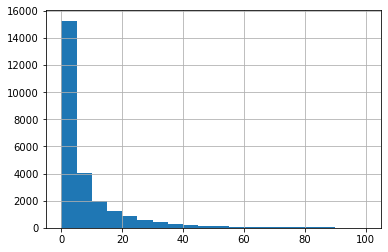

In [36]:
transfers.groupby('customerId').agg('count')['total'].sort_values(ascending=False).hist(range=(0,100),bins=20)
plt.show()

In [37]:
### transfer sum

In [38]:
transfers.groupby('customerId').agg(np.sum)['total'].sort_values(ascending=False)

customerId
5e19e338580d530056bdcd03    9.932975e+07
5de01ed59ce4780087fa1cc6    4.945000e+07
5e1bb63ca7f353007914155f    4.704001e+07
5e83cf16a88c16007db1b4b6    4.154851e+07
5e233730797b000052a4ddfe    3.916736e+07
                                ...     
5f3b3320c4fa2013d3930848    3.995500e-04
5ed4fd25a5eb630073ff720e    3.992600e-04
5f3f0fe7667819647d92c85f    3.970300e-04
5f3478ee2e8c252deb4b2a09    3.953500e-04
5f3f03471f398c49b17152b7    3.943100e-04
Name: total, Length: 25785, dtype: float64

In [39]:
(transfers.groupby('customerId').agg(np.sum)['total'].sort_values(ascending=False).cumsum()/np.sum(transfers['total'])*100)

customerId
5e19e338580d530056bdcd03      0.614372
5de01ed59ce4780087fa1cc6      0.920229
5e1bb63ca7f353007914155f      1.211180
5e83cf16a88c16007db1b4b6      1.468165
5e233730797b000052a4ddfe      1.710422
                               ...    
5f3b3320c4fa2013d3930848    100.000000
5ed4fd25a5eb630073ff720e    100.000000
5f3f0fe7667819647d92c85f    100.000000
5f3478ee2e8c252deb4b2a09    100.000000
5f3f03471f398c49b17152b7    100.000000
Name: total, Length: 25785, dtype: float64

In [40]:
(transfers.groupby('customerId').agg(np.sum)['total'].sort_values(ascending=False).cumsum()/np.sum(transfers['total'])*100).head(5201)

customerId
5e19e338580d530056bdcd03     0.614372
5de01ed59ce4780087fa1cc6     0.920229
5e1bb63ca7f353007914155f     1.211180
5e83cf16a88c16007db1b4b6     1.468165
5e233730797b000052a4ddfe     1.710422
                              ...    
5f45826b3e5c69628b01d2c1    79.986342
5eae0c5b57adb1007d393813    79.990858
5e1e107c214cfa004bd6aadf    79.995373
5e25b9530e5e7c004b0e90a2    79.999888
5de5b325da1f2d44672a88e6    80.004403
Name: total, Length: 5201, dtype: float64

In [41]:
261/len(transfers['customerId'].unique())*100
### 1% of clientes (261 clients) make 20% of the total amount of trnasfers

1.0122164048865618

In [42]:
5201/len(transfers['customerId'].unique())*100
### 20% of clientes (5201 clients) make 80% of the total amount of trnasfers

20.170641846034513

In [43]:
(transfers.groupby('customerId').agg(np.sum)['total'].sort_values(ascending=False)).head(5201)

customerId
5e19e338580d530056bdcd03    9.932975e+07
5de01ed59ce4780087fa1cc6    4.945000e+07
5e1bb63ca7f353007914155f    4.704001e+07
5e83cf16a88c16007db1b4b6    4.154851e+07
5e233730797b000052a4ddfe    3.916736e+07
                                ...     
5f45826b3e5c69628b01d2c1    7.300000e+05
5eae0c5b57adb1007d393813    7.300000e+05
5e1e107c214cfa004bd6aadf    7.300000e+05
5e25b9530e5e7c004b0e90a2    7.300000e+05
5de5b325da1f2d44672a88e6    7.300000e+05
Name: total, Length: 5201, dtype: float64

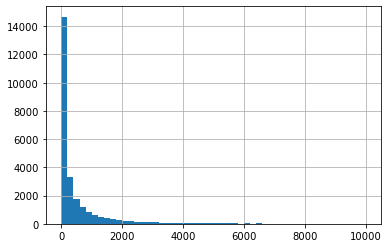

In [44]:
(transfers.groupby('customerId').agg(np.sum)['total']/1000).sort_values(ascending=False).hist(range=(0,10000),bins=50)
plt.show()

In [45]:
### transfer count and sum

In [46]:
clt_count = transfers.groupby('customerId').agg('count')[['total']].sort_values('total',ascending=False).reset_index()
clt_count = clt_count.rename(columns={'total':'transfer_count'})
clt_count.head()

,customerId,transfer_count
0,5e1bb63ca7f353007914155f,978
1,5e7a6d46d252e432e500df0f,787
2,5e19e338580d530056bdcd03,620
3,5e233730797b000052a4ddfe,574
4,5e2b4d67bf3b7a00603e48d9,402


In [47]:
clt_count['transfer_count_rank'] = clt_count['transfer_count'].rank(ascending=False)
clt_count.head()

,customerId,transfer_count,transfer_count_rank
0,5e1bb63ca7f353007914155f,978,1.0
1,5e7a6d46d252e432e500df0f,787,2.0
2,5e19e338580d530056bdcd03,620,3.0
3,5e233730797b000052a4ddfe,574,4.0
4,5e2b4d67bf3b7a00603e48d9,402,5.0


In [48]:
clt_sum = transfers.groupby('customerId').agg(np.sum)[['total']].sort_values('total',ascending=False).reset_index()
clt_sum = clt_sum.rename(columns={'total':'transfer_sum'})
clt_sum.head()

,customerId,transfer_sum
0,5e19e338580d530056bdcd03,9.932975e+07
1,5de01ed59ce4780087fa1cc6,4.945000e+07
2,5e1bb63ca7f353007914155f,4.704001e+07
3,5e83cf16a88c16007db1b4b6,4.154851e+07
4,5e233730797b000052a4ddfe,3.916736e+07


In [49]:
clt_sum['transfer_sum_rank'] = clt_sum['transfer_sum'].rank(ascending=False)
clt_sum.head()

,customerId,transfer_sum,transfer_sum_rank
0,5e19e338580d530056bdcd03,9.932975e+07,1.0
1,5de01ed59ce4780087fa1cc6,4.945000e+07,2.0
2,5e1bb63ca7f353007914155f,4.704001e+07,3.0
3,5e83cf16a88c16007db1b4b6,4.154851e+07,4.0
4,5e233730797b000052a4ddfe,3.916736e+07,5.0


In [50]:
clt_count_sum_transfer = pd.merge(clt_count,clt_sum,how='left',on='customerId')
clt_count_sum_transfer.head()

,customerId,transfer_count,transfer_count_rank,transfer_sum,transfer_sum_rank
0,5e1bb63ca7f353007914155f,978,1.0,4.704001e+07,3.0
1,5e7a6d46d252e432e500df0f,787,2.0,3.262310e+07,7.0
2,5e19e338580d530056bdcd03,620,3.0,9.932975e+07,1.0
3,5e233730797b000052a4ddfe,574,4.0,3.916736e+07,5.0
4,5e2b4d67bf3b7a00603e48d9,402,5.0,2.784210e+07,10.0


In [51]:
clt_count_sum_transfer.isnull().sum().sum()

0

In [52]:
clt_count_sum_transfer['rank_avg'] = (clt_count_sum_transfer['transfer_count_rank']+clt_count_sum_transfer['transfer_sum_rank'])/2
clt_count_sum_transfer.sort_values('rank_avg').head()

,customerId,transfer_count,transfer_count_rank,transfer_sum,transfer_sum_rank,rank_avg
0,5e1bb63ca7f353007914155f,978,1.0,4.704001e+07,3.0,2.0
2,5e19e338580d530056bdcd03,620,3.0,9.932975e+07,1.0,2.0
1,5e7a6d46d252e432e500df0f,787,2.0,3.262310e+07,7.0,4.5
3,5e233730797b000052a4ddfe,574,4.0,3.916736e+07,5.0,4.5
4,5e2b4d67bf3b7a00603e48d9,402,5.0,2.784210e+07,10.0,7.5


## Q: Is there a correlation between the number of transfers and the total amount transfered by each client?
## A: Yes, there is a correlation of 78% between transfer_count and transfer_sum.

In [53]:
clt_count_sum_transfer[['transfer_count','transfer_sum']].corr()

,transfer_count,transfer_sum
transfer_count,1.000000,0.779376
transfer_sum,0.779376,1.000000


## Q: How does the total amount transfered evolve over time?
## A: Transfers skyrocket in april, peak in june and progressively decrease.

In [54]:
transfers['date'] = transfers['createdAt'].dt.date
transfers.head()

,id,total,customerId,createdAt,disorder,date
0,29261,50000.0,5de2ffee6bad5850e5d3a0e3,2019-12-01 00:00:26.899000+00:00,0,2019-12-01
1,29262,50000.0,5d76f219cc8ccc0047caba8c,2019-12-01 00:04:47.894000+00:00,0,2019-12-01
2,29263,50000.0,5de304f06bad5850e5d3a269,2019-12-01 00:11:39.676000+00:00,0,2019-12-01
3,29264,31000.0,5dd1628b3bea4b0060742232,2019-12-01 00:13:25.523000+00:00,0,2019-12-01
4,29265,30000.0,5dd0adca3bea4b0060741da7,2019-12-01 00:13:57.747000+00:00,0,2019-12-01


In [55]:
transfers_agg_date = transfers.groupby('date')['total'].agg([np.sum,'count']).reset_index()
transfers_agg_date.head()

,date,sum,count
0,2019-12-01,1.247756e+07,192
1,2019-12-02,2.492682e+07,381
2,2019-12-03,3.104281e+07,379
3,2019-12-04,1.713192e+07,318
4,2019-12-05,2.431264e+07,283


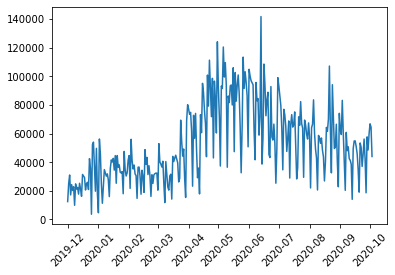

In [56]:
plt.plot(transfers_agg_date['date'],transfers_agg_date['sum']/1000)
plt.xticks(rotation=45)
plt.show()

In [57]:
transfers_agg_date['sum'].rolling(window=7, center=False)

Rolling [window=7,center=False,axis=0]

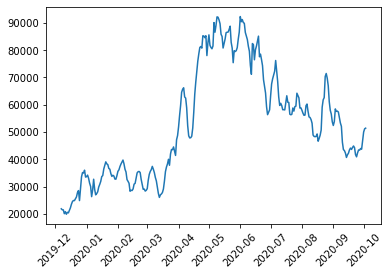

In [58]:
### rolling average 7 days
plt.plot(transfers_agg_date['date'],transfers_agg_date['sum'].rolling(window=7, center=False).mean()/1000)
plt.xticks(rotation=45)
plt.show()

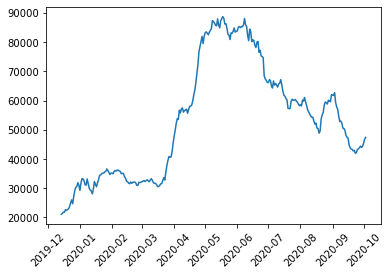

In [59]:
### rolling average 14 days
plt.plot(transfers_agg_date['date'],transfers_agg_date['sum'].rolling(window=14, center=False).mean()/1000)
plt.xticks(rotation=45)
plt.show()

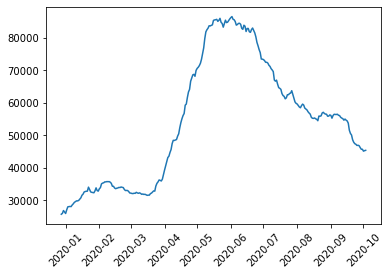

In [60]:
### rolling average 28 days
plt.plot(transfers_agg_date['date'],transfers_agg_date['sum'].rolling(window=28, center=False).mean()/1000)
plt.xticks(rotation=45)
plt.show()

## Q: How does the number of transfers evolve over time? Does it have the same shape as the amount transfered?
## A: Generally speaking yes, it evolves in the same way. But the correlation is weaker since August: the number of transfers grows faster that the grow of the total amount transfered. This could be explained by a decrease in the average amount transfered since August.

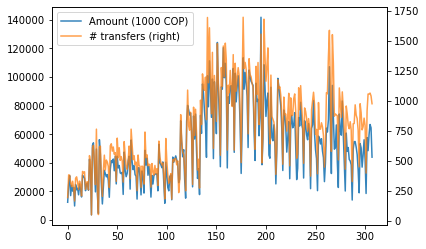

In [61]:
(transfers_agg_date['sum']/1000).plot(label="Amount (1000 COP)", legend=True,alpha=0.9)
transfers_agg_date['count'].plot(secondary_y=True, label="# transfers", legend=True,alpha=0.75)
plt.show()

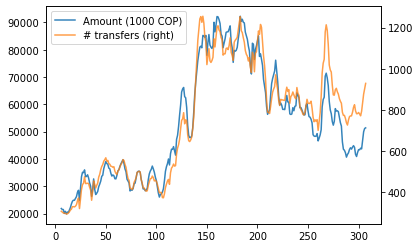

In [62]:
(transfers_agg_date['sum'].rolling(window=7, center=False).mean()/1000).plot(label="Amount (1000 COP)", legend=True,alpha=0.9)
(transfers_agg_date['count'].rolling(window=7, center=False).mean()).plot(secondary_y=True, label="# transfers", legend=True,alpha=0.75)
plt.show()

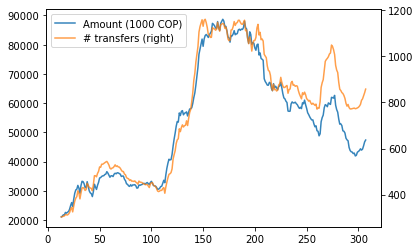

In [63]:
(transfers_agg_date['sum'].rolling(window=14, center=False).mean()/1000).plot(label="Amount (1000 COP)", legend=True,alpha=0.9)
(transfers_agg_date['count'].rolling(window=14, center=False).mean()).plot(secondary_y=True, label="# transfers", legend=True,alpha=0.75)
plt.show()

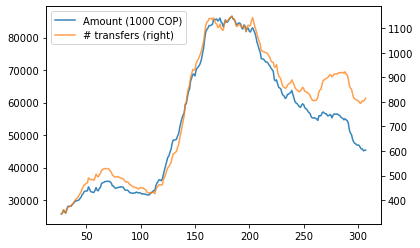

In [64]:
(transfers_agg_date['sum'].rolling(window=28, center=False).mean()/1000).plot(label="Amount (1000 COP)", legend=True,alpha=0.9)
(transfers_agg_date['count'].rolling(window=28, center=False).mean()).plot(secondary_y=True, label="# transfers", legend=True,alpha=0.75)
plt.show()

# Q: Does the average amount transfererd per day decreases over time?
# A: The average amount of transfers peaks in May, and since it has been on a downward trend.

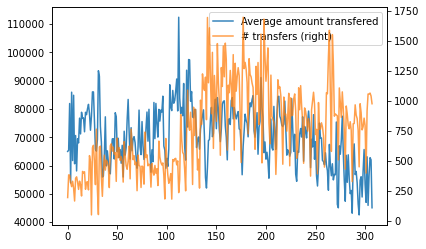

In [65]:
(transfers_agg_date['sum']/transfers_agg_date['count']).plot(label="Average amount transfered", legend=True,alpha=0.9)
transfers_agg_date['count'].plot(secondary_y=True, label="# transfers", legend=True,alpha=0.75)
plt.show()

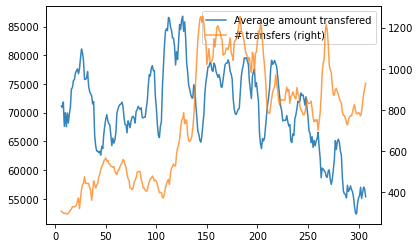

In [66]:
### rolling average 7 days
(transfers_agg_date['sum'].rolling(window=7, center=False).mean()/transfers_agg_date['count'].rolling(window=7, center=False).mean()).plot(label="Average amount transfered", legend=True,alpha=0.9)
(transfers_agg_date['count'].rolling(window=7, center=False).mean()).plot(secondary_y=True, label="# transfers", legend=True,alpha=0.75)
plt.show()

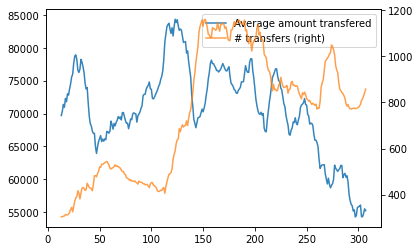

In [67]:
### rolling average 14 days
(transfers_agg_date['sum'].rolling(window=14, center=False).mean()/transfers_agg_date['count'].rolling(window=14, center=False).mean()).plot(label="Average amount transfered", legend=True,alpha=0.9)
(transfers_agg_date['count'].rolling(window=14, center=False).mean()).plot(secondary_y=True, label="# transfers", legend=True,alpha=0.75)
plt.show()

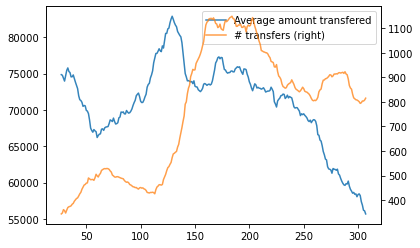

In [68]:
### rolling average 28 days
(transfers_agg_date['sum'].rolling(window=28, center=False).mean()/transfers_agg_date['count'].rolling(window=28, center=False).mean()).plot(label="Average amount transfered", legend=True,alpha=0.9)
(transfers_agg_date['count'].rolling(window=28, center=False).mean()).plot(secondary_y=True, label="# transfers", legend=True,alpha=0.75)
plt.show()

# Q: Is the decrease of the average amount transfered by day related to new customers?
# A: There is no evidence that suggests that "new" clients decrease the amount transfered by day.

In [69]:
transfers['customerId'].unique()

array(['5de2ffee6bad5850e5d3a0e3', '5d76f219cc8ccc0047caba8c',
       '5de304f06bad5850e5d3a269', ..., '5f767a687d69bc6a70f7b90f',
       '5f751fa0fec25b1b26c6b4d5', '5f6a478407f43f0084573585'],
      dtype=object)

In [70]:
clients_minCreatedAt = transfers.groupby('customerId').agg(np.min)[['createdAt']].reset_index().sort_values('createdAt')
clients_minCreatedAt.head()

,customerId,createdAt
2713,5de2ffee6bad5850e5d3a0e3,2019-12-01 00:00:26.899000+00:00
778,5d76f219cc8ccc0047caba8c,2019-12-01 00:04:47.894000+00:00
2714,5de304f06bad5850e5d3a269,2019-12-01 00:11:39.676000+00:00
2101,5dd1628b3bea4b0060742232,2019-12-01 00:13:25.523000+00:00
2087,5dd0adca3bea4b0060741da7,2019-12-01 00:13:57.747000+00:00


In [71]:
clients_minCreatedAt['date'] = clients_minCreatedAt['createdAt'].dt.date
clients_minCreatedAt.head()

,customerId,createdAt,date
2713,5de2ffee6bad5850e5d3a0e3,2019-12-01 00:00:26.899000+00:00,2019-12-01
778,5d76f219cc8ccc0047caba8c,2019-12-01 00:04:47.894000+00:00,2019-12-01
2714,5de304f06bad5850e5d3a269,2019-12-01 00:11:39.676000+00:00,2019-12-01
2101,5dd1628b3bea4b0060742232,2019-12-01 00:13:25.523000+00:00,2019-12-01
2087,5dd0adca3bea4b0060741da7,2019-12-01 00:13:57.747000+00:00,2019-12-01


In [72]:
clients_minCreatedAt_count = clients_minCreatedAt.groupby('date').agg('count').reset_index()[['date','createdAt']]
clients_minCreatedAt_count = clients_minCreatedAt_count.rename(columns={'createdAt':'new_clients_count_per_day'})
clients_minCreatedAt_count.head()

,date,new_clients_count_per_day
0,2019-12-01,139
1,2019-12-02,260
2,2019-12-03,223
3,2019-12-04,173
4,2019-12-05,145


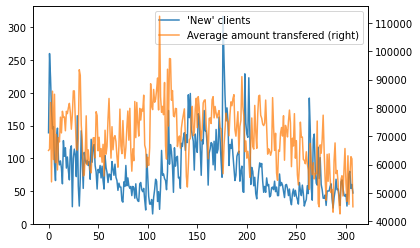

In [325]:
clients_minCreatedAt_count['new_clients_count_per_day'].plot(x='date',alpha=0.9,label="'New' clients",legend=True)
(transfers_agg_date['sum']/transfers_agg_date['count']).plot(secondary_y=True,label="Average amount transfered", legend=True,alpha=0.75)
plt.show()

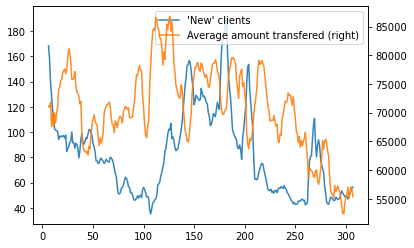

In [326]:
### rolling average 7 days
(clients_minCreatedAt_count['new_clients_count_per_day'].rolling(window=7, center=False).mean()).plot(label="'New' clients", legend=True,alpha=0.9)
(transfers_agg_date['sum'].rolling(window=7, center=False).mean()/transfers_agg_date['count'].rolling(window=7, center=False).mean()).plot(label="Average amount transfered", legend=True,alpha=0.9,secondary_y=True)
plt.show()

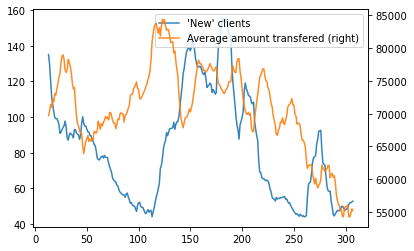

In [327]:
### rolling average 14 days
(clients_minCreatedAt_count['new_clients_count_per_day'].rolling(window=14, center=False).mean()).plot(label="'New' clients", legend=True,alpha=0.9)
(transfers_agg_date['sum'].rolling(window=14, center=False).mean()/transfers_agg_date['count'].rolling(window=14, center=False).mean()).plot(label="Average amount transfered", legend=True,alpha=0.9,secondary_y=True)
plt.show()

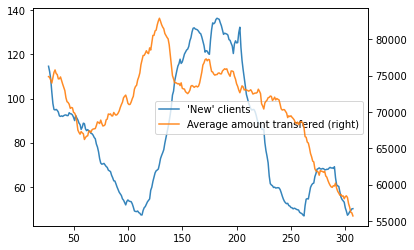

In [328]:
### rolling average 28 days
(clients_minCreatedAt_count['new_clients_count_per_day'].rolling(window=28, center=False).mean()).plot(label="'New' clients", legend=True,alpha=0.9)
(transfers_agg_date['sum'].rolling(window=28, center=False).mean()/transfers_agg_date['count'].rolling(window=28, center=False).mean()).plot(label="Average amount transfered", legend=True,alpha=0.9,secondary_y=True)
plt.show()

# Q: What is the relationship between "new" clients and the total amount transfered per day?
# A: The number of "new" clients each day is positive related to the total amount of transfers that day between May and July. Since August the number of new clients decreases and so does the amount transferred but more slowly.

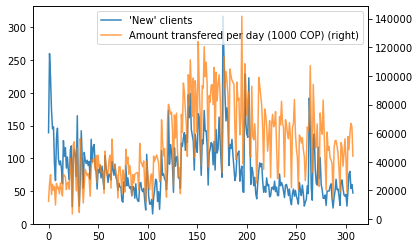

In [329]:
clients_minCreatedAt_count['new_clients_count_per_day'].plot(x='date',alpha=0.9,label="'New' clients",legend=True)
(transfers_agg_date['sum']/1000).plot(secondary_y=True,label="Amount transfered per day (1000 COP)", legend=True,alpha=0.75)
plt.show()

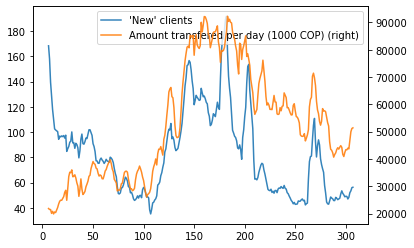

In [330]:
### rolling average 7 days
(clients_minCreatedAt_count['new_clients_count_per_day'].rolling(window=7, center=False).mean()).plot(label="'New' clients", legend=True,alpha=0.9)
(transfers_agg_date['sum']/1000).rolling(window=7, center=False).mean().plot(label="Amount transfered per day (1000 COP)", legend=True,alpha=0.9,secondary_y=True)
plt.show()

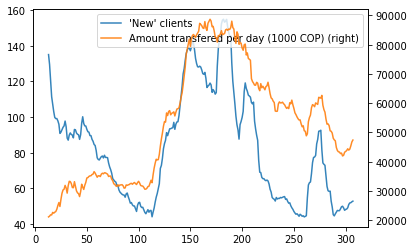

In [331]:
### rolling average 14 days
(clients_minCreatedAt_count['new_clients_count_per_day'].rolling(window=14, center=False).mean()).plot(label="'New' clients", legend=True,alpha=0.9)
(transfers_agg_date['sum']/1000).rolling(window=14, center=False).mean().plot(label="Amount transfered per day (1000 COP)", legend=True,alpha=0.9,secondary_y=True)
plt.show()

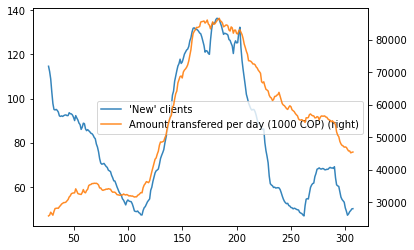

In [332]:
### rolling average 28 days
(clients_minCreatedAt_count['new_clients_count_per_day'].rolling(window=28, center=False).mean()).plot(label="'New' clients", legend=True,alpha=0.9)
(transfers_agg_date['sum']/1000).rolling(window=28, center=False).mean().plot(label="Amount transfered per day (1000 COP)", legend=True,alpha=0.9,secondary_y=True)
plt.show()

## Q: Are transfers equally distributed across the days of the week (number of  transactions)?
## A: Transfers are more or less equally distributed across days of the week, except on sundays when they drop by half.

In [333]:
transfers['week_day'] = transfers['createdAt'].dt.weekday
transfers.head()

,id,total,customerId,createdAt,disorder,date,week_day
0,29261,50000.0,5de2ffee6bad5850e5d3a0e3,2019-12-01 00:00:26.899000+00:00,0,2019-12-01,6
1,29262,50000.0,5d76f219cc8ccc0047caba8c,2019-12-01 00:04:47.894000+00:00,0,2019-12-01,6
2,29263,50000.0,5de304f06bad5850e5d3a269,2019-12-01 00:11:39.676000+00:00,0,2019-12-01,6
3,29264,31000.0,5dd1628b3bea4b0060742232,2019-12-01 00:13:25.523000+00:00,0,2019-12-01,6
4,29265,30000.0,5dd0adca3bea4b0060741da7,2019-12-01 00:13:57.747000+00:00,0,2019-12-01,6


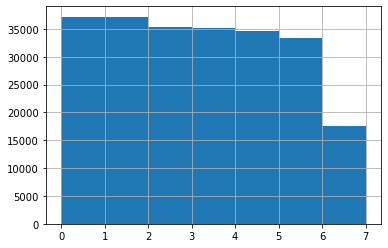

In [334]:
transfers['week_day'].hist(range=(0,7),bins=7)
plt.show()

## Q: Is the amount tranfered equally distributed across the days of the week?
## A: The amount transfered is more or less equally distributed across days of the week, except on sundays when they drop by half (and a little bit on saturdays).

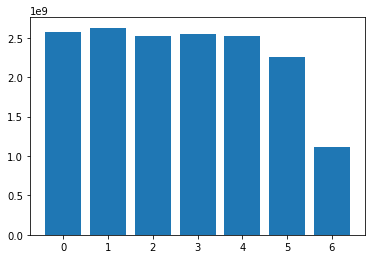

In [335]:
plt.bar(transfers.groupby('week_day').agg(np.sum)['total'].index,transfers.groupby('week_day').agg(np.sum)['total'])
plt.show()

## Q: How does the number of transfers evolve throughout the day?
## A: Few transfers are made between 00:00 and 09:00. From 10:00 transfers increase sharply, peak at 15:00 and then they progressively decrease.

In [336]:
transfers['hour'] = transfers['createdAt'].dt.hour
transfers.head()

,id,total,customerId,createdAt,disorder,date,week_day,hour
0,29261,50000.0,5de2ffee6bad5850e5d3a0e3,2019-12-01 00:00:26.899000+00:00,0,2019-12-01,6,0
1,29262,50000.0,5d76f219cc8ccc0047caba8c,2019-12-01 00:04:47.894000+00:00,0,2019-12-01,6,0
2,29263,50000.0,5de304f06bad5850e5d3a269,2019-12-01 00:11:39.676000+00:00,0,2019-12-01,6,0
3,29264,31000.0,5dd1628b3bea4b0060742232,2019-12-01 00:13:25.523000+00:00,0,2019-12-01,6,0
4,29265,30000.0,5dd0adca3bea4b0060741da7,2019-12-01 00:13:57.747000+00:00,0,2019-12-01,6,0


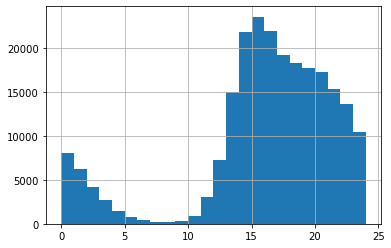

In [337]:
transfers['hour'].hist(range=(0,24),bins=24)
plt.show()

### Q:Day of the month and total amount transfered?
### A: The first 3 days of the month the total amount transfered is +20% higer than the average of the remaining periods (3-day periods).

In [338]:
transfers['day'] = transfers['createdAt'].dt.day
transfers.head()

,id,total,customerId,createdAt,disorder,date,week_day,hour,day
0,29261,50000.0,5de2ffee6bad5850e5d3a0e3,2019-12-01 00:00:26.899000+00:00,0,2019-12-01,6,0,1
1,29262,50000.0,5d76f219cc8ccc0047caba8c,2019-12-01 00:04:47.894000+00:00,0,2019-12-01,6,0,1
2,29263,50000.0,5de304f06bad5850e5d3a269,2019-12-01 00:11:39.676000+00:00,0,2019-12-01,6,0,1
3,29264,31000.0,5dd1628b3bea4b0060742232,2019-12-01 00:13:25.523000+00:00,0,2019-12-01,6,0,1
4,29265,30000.0,5dd0adca3bea4b0060741da7,2019-12-01 00:13:57.747000+00:00,0,2019-12-01,6,0,1


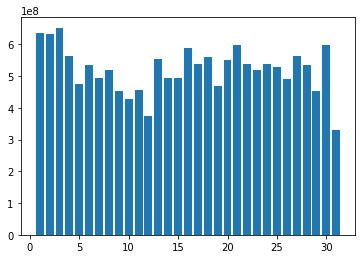

In [339]:
plt.bar(transfers.groupby('day').agg(np.sum)['total'].index,transfers.groupby('day').agg(np.sum)['total'])
plt.show()

In [340]:
transfers['month_t1'] = np.where(transfers['day']<=3,1,0)
transfers['month_t2'] = np.where((transfers['day']<=6)&(transfers['day']>3),1,0)
transfers['month_t3'] = np.where((transfers['day']<=9)&(transfers['day']>6),1,0)
transfers['month_t4'] = np.where((transfers['day']<=12)&(transfers['day']>9),1,0)
transfers['month_t5'] = np.where((transfers['day']<=15)&(transfers['day']>12),1,0)
transfers['month_t6'] = np.where((transfers['day']<=18)&(transfers['day']>15),1,0)
transfers['month_t7'] = np.where((transfers['day']<=21)&(transfers['day']>18),1,0)
transfers['month_t8'] = np.where((transfers['day']<=24)&(transfers['day']>21),1,0)
transfers['month_t9'] = np.where((transfers['day']<=27)&(transfers['day']>24),1,0)
transfers['month_t10'] = np.where((transfers['day']>27),1,0)
transfers.head()

,id,total,customerId,createdAt,disorder,date,week_day,hour,day,month_t1,month_t2,month_t3,month_t4,month_t5,month_t6,month_t7,month_t8,month_t9,month_t10
0,29261,50000.0,5de2ffee6bad5850e5d3a0e3,2019-12-01 00:00:26.899000+00:00,0,2019-12-01,6,0,1,1,0,0,0,0,0,0,0,0,0
1,29262,50000.0,5d76f219cc8ccc0047caba8c,2019-12-01 00:04:47.894000+00:00,0,2019-12-01,6,0,1,1,0,0,0,0,0,0,0,0,0
2,29263,50000.0,5de304f06bad5850e5d3a269,2019-12-01 00:11:39.676000+00:00,0,2019-12-01,6,0,1,1,0,0,0,0,0,0,0,0,0
3,29264,31000.0,5dd1628b3bea4b0060742232,2019-12-01 00:13:25.523000+00:00,0,2019-12-01,6,0,1,1,0,0,0,0,0,0,0,0,0
4,29265,30000.0,5dd0adca3bea4b0060741da7,2019-12-01 00:13:57.747000+00:00,0,2019-12-01,6,0,1,1,0,0,0,0,0,0,0,0,0


In [341]:
(transfers.groupby('month_t1').sum()/1000000/3)['total'][1]

640.9702095964369

In [342]:
(transfers.groupby('month_t2').sum()/1000000/3)['total'][1]

524.6396266133339

In [343]:
(transfers.groupby('month_t3').sum()/1000000/3)['total'][1]

489.88294879618053

In [344]:
(transfers.groupby('month_t4').sum()/1000000/3)['total'][1]

420.96274106733773

In [345]:
(transfers.groupby('month_t5').sum()/1000000/3)['total'][1]

514.2052687919368

In [346]:
(transfers.groupby('month_t6').sum()/1000000/3)['total'][1]

561.5709434927663

In [347]:
(transfers.groupby('month_t7').sum()/1000000/3)['total'][1]

539.1876947203522

In [348]:
(transfers.groupby('month_t8').sum()/1000000/3)['total'][1]

531.6037397281292

In [349]:
(transfers.groupby('month_t9').sum()/1000000/3)['total'][1]

526.7601066317103

In [350]:
(transfers.groupby('month_t10').sum()/1000000/3.5)['total'][1]

548.0959359884773

In [351]:
avg_t2_to_t10 = ((transfers.groupby('month_t2').sum()/1000000/3)['total'][1] +
(transfers.groupby('month_t3').sum()/1000000/3)['total'][1]+
(transfers.groupby('month_t4').sum()/1000000/3)['total'][1]+
(transfers.groupby('month_t5').sum()/1000000/3)['total'][1]+
(transfers.groupby('month_t6').sum()/1000000/3)['total'][1]+
(transfers.groupby('month_t7').sum()/1000000/3)['total'][1]+
(transfers.groupby('month_t8').sum()/1000000/3)['total'][1]+
(transfers.groupby('month_t9').sum()/1000000/3)['total'][1]+
(transfers.groupby('month_t10').sum()/1000000/3.5)['total'][1])/9

In [352]:
(((transfers.groupby('month_t1').sum()/1000000/3)['total'][1] -avg_t2_to_t10)/avg_t2_to_t10)*100

23.874696266252123

### Q: days under 50 transfers?
### A: Christmas and new year

In [353]:
transfers_agg_date.head()

,date,sum,count
0,2019-12-01,1.247756e+07,192
1,2019-12-02,2.492682e+07,381
2,2019-12-03,3.104281e+07,379
3,2019-12-04,1.713192e+07,318
4,2019-12-05,2.431264e+07,283


In [360]:
transfers_agg_date[transfers_agg_date['count']<51]

,date,sum,count
24,2019-12-25,3642299.00,47
31,2020-01-01,4674852.92,50


### Q: 20% top and 1% top clients behaviour
### A: Both shapes look like total transfers

In [82]:
len(transfers['customerId'].unique())*0.2
top20_clients = transfers.groupby('customerId').agg(np.sum)['total'].sort_values(ascending=False).head(int(len(transfers['customerId'].unique())*0.2)).index
top20_clients

Index(['5e19e338580d530056bdcd03', '5de01ed59ce4780087fa1cc6',
       '5e1bb63ca7f353007914155f', '5e83cf16a88c16007db1b4b6',
       '5e233730797b000052a4ddfe', '5e190892459f6f0059f9a66c',
       '5e7a6d46d252e432e500df0f', '5e22131e825e6e0075621aee',
       '5d8d03b5d01c17005eaec768', '5e2b4d67bf3b7a00603e48d9',
       ...
       '5d89346d3e4fc20078e131e0', '5e9cba00ead63867d7a6d3f6',
       '5d8a9a66135e3a00707be1f3', '5e20e13ee3659a0052a4374b',
       '5ebae8ee095c6800629f09ac', '5e0d05fd8da0110074a0ee3f',
       '5f0b6c26096d740080342565', '5dcc178e0b7910006d78c2a4',
       '5cd3722b675d9b001e24bb2c', '5d7fccb04502c9005b5bd093'],
      dtype='object', name='customerId', length=5157)

In [91]:
len(transfers['customerId'].unique())*0.01
top1_clients = transfers.groupby('customerId').agg(np.sum)['total'].sort_values(ascending=False).head(int(len(transfers['customerId'].unique())*0.01)).index
top1_clients

Index(['5e19e338580d530056bdcd03', '5de01ed59ce4780087fa1cc6',
       '5e1bb63ca7f353007914155f', '5e83cf16a88c16007db1b4b6',
       '5e233730797b000052a4ddfe', '5e190892459f6f0059f9a66c',
       '5e7a6d46d252e432e500df0f', '5e22131e825e6e0075621aee',
       '5d8d03b5d01c17005eaec768', '5e2b4d67bf3b7a00603e48d9',
       ...
       '5e39e06e57d578008640d9b8', '5dd6e1e972493500644064ef',
       '5dac3e5289d7fa005e29ac72', '5d07c9b16c4d13001f6ce4fc',
       '5e14dd368986c4007572c6a4', '5dc5f578b3090a008747cc00',
       '5e7e4470a87a42007cd212a6', '5e8500a0e08f60005de9b1fd',
       '5dc4cbc688d1e6006dd3ba5f', '5ec6cf4df5b36f72a1c179d2'],
      dtype='object', name='customerId', length=257)

In [85]:
top20 = transfers[transfers['customerId'].isin(top20_clients)]
top20.head()

,id,total,customerId,createdAt,disorder,date
2,29263,50000.000,5de304f06bad5850e5d3a269,2019-12-01 00:11:39.676000+00:00,0,2019-12-01
5,29266,70000.000,5d2d1991f92119003e0f8c99,2019-12-01 00:15:35.411000+00:00,0,2019-12-01
6,29267,50000.000,5d290d8ded461d003dcc793a,2019-12-01 00:16:24.057000+00:00,0,2019-12-01
7,29268,31999.999,5dd7f9605e739a00781ac1cc,2019-12-01 00:19:30.880000+00:00,0,2019-12-01
8,29269,60000.000,5c538a696fc5fb0022f2b808,2019-12-01 00:21:43.706000+00:00,0,2019-12-01


In [92]:
top1 = transfers[transfers['customerId'].isin(top1_clients)]
top1.head()

,id,total,customerId,createdAt,disorder,date
10,29271,150000.0,5c7566296d47f1002264c425,2019-12-01 00:26:33.210000+00:00,0,2019-12-01
21,29282,48000.0,5c7566296d47f1002264c425,2019-12-01 01:04:15.135000+00:00,0,2019-12-01
33,29294,94000.0,5dc168dad77631006b5b3557,2019-12-01 03:17:21.202000+00:00,0,2019-12-01
34,29295,94000.0,5dc168dad77631006b5b3557,2019-12-01 03:19:23.613000+00:00,0,2019-12-01
50,29311,300000.0,5dc61a11b3090a008747d236,2019-12-01 13:04:17.167000+00:00,0,2019-12-01


In [87]:
transfers_agg_date_top20 = top20.groupby('date')['total'].agg([np.sum,'count'])
transfers_agg_date_top20.head()

,sum,count
date,,
2019-12-01,7.003364e+06,88
2019-12-02,1.620058e+07,208
2019-12-03,2.193741e+07,210
2019-12-04,9.145920e+06,151
2019-12-05,1.640880e+07,152


In [93]:
transfers_agg_date_top1 = top1.groupby('date')['total'].agg([np.sum,'count'])
transfers_agg_date_top1.head()

,sum,count
date,,
2019-12-01,2389500.000,21
2019-12-02,3209764.588,31
2019-12-03,6143723.265,25
2019-12-04,1231000.000,12
2019-12-05,6013579.924,37


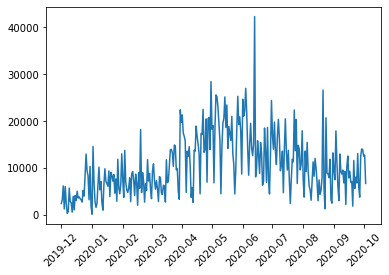

In [94]:
plt.plot(transfers_agg_date_top1.index,transfers_agg_date_top1['sum']/1000)
plt.xticks(rotation=45)
plt.show()

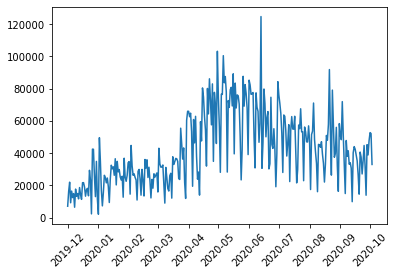

In [89]:
plt.plot(transfers_agg_date_top20.index,transfers_agg_date_top20['sum']/1000)
plt.xticks(rotation=45)
plt.show()

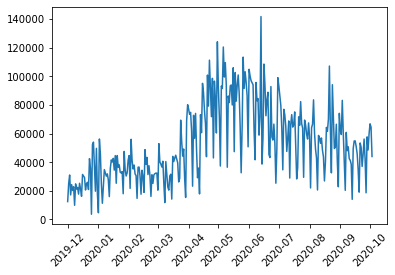

In [90]:
plt.plot(transfers_agg_date['date'],transfers_agg_date['sum']/1000)
plt.xticks(rotation=45)
plt.show()

In [96]:
np.min(transfers_agg_date_top1.index)

datetime.date(2019, 12, 1)

In [97]:
np.max(transfers_agg_date_top1.index)

datetime.date(2020, 10, 3)

In [98]:
len(transfers_agg_date_top1.index)

307

In [101]:
len(transfers_agg_date_top20.index)

308

In [100]:
len(transfers_agg_date.index)

308

### Q: top 1% and 20% new clients cumsum

In [108]:
top1_clients

Index(['5e19e338580d530056bdcd03', '5de01ed59ce4780087fa1cc6',
       '5e1bb63ca7f353007914155f', '5e83cf16a88c16007db1b4b6',
       '5e233730797b000052a4ddfe', '5e190892459f6f0059f9a66c',
       '5e7a6d46d252e432e500df0f', '5e22131e825e6e0075621aee',
       '5d8d03b5d01c17005eaec768', '5e2b4d67bf3b7a00603e48d9',
       ...
       '5e39e06e57d578008640d9b8', '5dd6e1e972493500644064ef',
       '5dac3e5289d7fa005e29ac72', '5d07c9b16c4d13001f6ce4fc',
       '5e14dd368986c4007572c6a4', '5dc5f578b3090a008747cc00',
       '5e7e4470a87a42007cd212a6', '5e8500a0e08f60005de9b1fd',
       '5dc4cbc688d1e6006dd3ba5f', '5ec6cf4df5b36f72a1c179d2'],
      dtype='object', name='customerId', length=257)

In [110]:
clients_minCreatedAt_top1 = transfers.groupby('customerId').agg(np.min)[['createdAt']].reset_index().sort_values('createdAt')
clients_minCreatedAt_top1 = clients_minCreatedAt_top1[clients_minCreatedAt_top1['customerId'].isin(top1_clients)]
clients_minCreatedAt_top1.head()

,customerId,createdAt
78,5c7566296d47f1002264c425,2019-12-01 00:26:33.210000+00:00
1527,5dc168dad77631006b5b3557,2019-12-01 03:17:21.202000+00:00
1716,5dc61a11b3090a008747d236,2019-12-01 13:04:17.167000+00:00
708,5d71e138482db6004a28810b,2019-12-01 13:24:58.582000+00:00
1641,5dc46f79d7abff006321a65f,2019-12-01 16:05:59.741000+00:00


In [111]:
clients_minCreatedAt_top1['date'] = clients_minCreatedAt_top1['createdAt'].dt.date
clients_minCreatedAt_top1.head()

,customerId,createdAt,date
78,5c7566296d47f1002264c425,2019-12-01 00:26:33.210000+00:00,2019-12-01
1527,5dc168dad77631006b5b3557,2019-12-01 03:17:21.202000+00:00,2019-12-01
1716,5dc61a11b3090a008747d236,2019-12-01 13:04:17.167000+00:00,2019-12-01
708,5d71e138482db6004a28810b,2019-12-01 13:24:58.582000+00:00,2019-12-01
1641,5dc46f79d7abff006321a65f,2019-12-01 16:05:59.741000+00:00,2019-12-01


In [112]:
clients_minCreatedAt_top1_count = clients_minCreatedAt_top1.groupby('date').agg('count').reset_index()[['date','createdAt']]
clients_minCreatedAt_top1_count = clients_minCreatedAt_top1_count.rename(columns={'createdAt':'new_clients_count_per_day'})
clients_minCreatedAt_top1_count.head()

,date,new_clients_count_per_day
0,2019-12-01,8
1,2019-12-02,11
2,2019-12-03,8
3,2019-12-04,3
4,2019-12-05,11


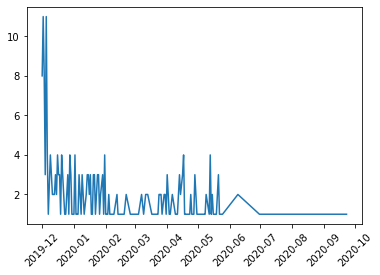

In [114]:
plt.plot(clients_minCreatedAt_top1_count['date'],clients_minCreatedAt_top1_count['new_clients_count_per_day'])
plt.xticks(rotation=45)
plt.show()

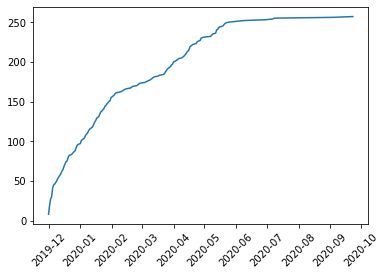

In [117]:
plt.plot(clients_minCreatedAt_top1_count['date'],clients_minCreatedAt_top1_count['new_clients_count_per_day'].cumsum())
plt.xticks(rotation=45)
plt.show()

In [118]:
top20_clients

Index(['5e19e338580d530056bdcd03', '5de01ed59ce4780087fa1cc6',
       '5e1bb63ca7f353007914155f', '5e83cf16a88c16007db1b4b6',
       '5e233730797b000052a4ddfe', '5e190892459f6f0059f9a66c',
       '5e7a6d46d252e432e500df0f', '5e22131e825e6e0075621aee',
       '5d8d03b5d01c17005eaec768', '5e2b4d67bf3b7a00603e48d9',
       ...
       '5d89346d3e4fc20078e131e0', '5e9cba00ead63867d7a6d3f6',
       '5d8a9a66135e3a00707be1f3', '5e20e13ee3659a0052a4374b',
       '5ebae8ee095c6800629f09ac', '5e0d05fd8da0110074a0ee3f',
       '5f0b6c26096d740080342565', '5dcc178e0b7910006d78c2a4',
       '5cd3722b675d9b001e24bb2c', '5d7fccb04502c9005b5bd093'],
      dtype='object', name='customerId', length=5157)

In [119]:
clients_minCreatedAt_top20 = transfers.groupby('customerId').agg(np.min)[['createdAt']].reset_index().sort_values('createdAt')
clients_minCreatedAt_top20 = clients_minCreatedAt_top20[clients_minCreatedAt_top20['customerId'].isin(top20_clients)]
clients_minCreatedAt_top20.head()

,customerId,createdAt
2714,5de304f06bad5850e5d3a269,2019-12-01 00:11:39.676000+00:00
401,5d2d1991f92119003e0f8c99,2019-12-01 00:15:35.411000+00:00
389,5d290d8ded461d003dcc793a,2019-12-01 00:16:24.057000+00:00
2374,5dd7f9605e739a00781ac1cc,2019-12-01 00:19:30.880000+00:00
12,5c538a696fc5fb0022f2b808,2019-12-01 00:21:43.706000+00:00


In [120]:
clients_minCreatedAt_top20['date'] = clients_minCreatedAt_top20['createdAt'].dt.date
clients_minCreatedAt_top20.head()

,customerId,createdAt,date
2714,5de304f06bad5850e5d3a269,2019-12-01 00:11:39.676000+00:00,2019-12-01
401,5d2d1991f92119003e0f8c99,2019-12-01 00:15:35.411000+00:00,2019-12-01
389,5d290d8ded461d003dcc793a,2019-12-01 00:16:24.057000+00:00,2019-12-01
2374,5dd7f9605e739a00781ac1cc,2019-12-01 00:19:30.880000+00:00,2019-12-01
12,5c538a696fc5fb0022f2b808,2019-12-01 00:21:43.706000+00:00,2019-12-01


In [121]:
clients_minCreatedAt_top20_count = clients_minCreatedAt_top20.groupby('date').agg('count').reset_index()[['date','createdAt']]
clients_minCreatedAt_top20_count = clients_minCreatedAt_top20_count.rename(columns={'createdAt':'new_clients_count_per_day'})
clients_minCreatedAt_top20_count.head()

,date,new_clients_count_per_day
0,2019-12-01,53
1,2019-12-02,118
2,2019-12-03,106
3,2019-12-04,62
4,2019-12-05,58


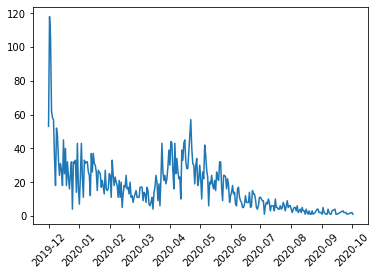

In [122]:
plt.plot(clients_minCreatedAt_top20_count['date'],clients_minCreatedAt_top20_count['new_clients_count_per_day'])
plt.xticks(rotation=45)
plt.show()

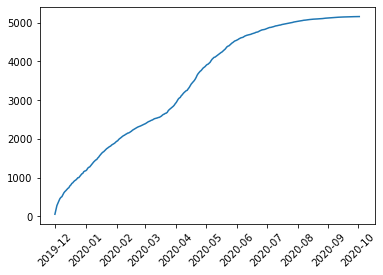

In [123]:
plt.plot(clients_minCreatedAt_top20_count['date'],clients_minCreatedAt_top20_count['new_clients_count_per_day'].cumsum())
plt.xticks(rotation=45)
plt.show()

In [125]:
transfers['customerId'].unique()

array(['5de2ffee6bad5850e5d3a0e3', '5d76f219cc8ccc0047caba8c',
       '5de304f06bad5850e5d3a269', ..., '5f767a687d69bc6a70f7b90f',
       '5f751fa0fec25b1b26c6b4d5', '5f6a478407f43f0084573585'],
      dtype=object)

In [126]:
clients_minCreatedAt = transfers.groupby('customerId').agg(np.min)[['createdAt']].reset_index().sort_values('createdAt')
#clients_minCreatedAt = clients_minCreatedAt[clients_minCreatedAt['customerId'].isin(top20_clients)]
clients_minCreatedAt.head()

,customerId,createdAt
2713,5de2ffee6bad5850e5d3a0e3,2019-12-01 00:00:26.899000+00:00
778,5d76f219cc8ccc0047caba8c,2019-12-01 00:04:47.894000+00:00
2714,5de304f06bad5850e5d3a269,2019-12-01 00:11:39.676000+00:00
2101,5dd1628b3bea4b0060742232,2019-12-01 00:13:25.523000+00:00
2087,5dd0adca3bea4b0060741da7,2019-12-01 00:13:57.747000+00:00


In [127]:
clients_minCreatedAt['date'] = clients_minCreatedAt['createdAt'].dt.date
clients_minCreatedAt.head()

,customerId,createdAt,date
2713,5de2ffee6bad5850e5d3a0e3,2019-12-01 00:00:26.899000+00:00,2019-12-01
778,5d76f219cc8ccc0047caba8c,2019-12-01 00:04:47.894000+00:00,2019-12-01
2714,5de304f06bad5850e5d3a269,2019-12-01 00:11:39.676000+00:00,2019-12-01
2101,5dd1628b3bea4b0060742232,2019-12-01 00:13:25.523000+00:00,2019-12-01
2087,5dd0adca3bea4b0060741da7,2019-12-01 00:13:57.747000+00:00,2019-12-01


In [128]:
clients_minCreatedAt_count = clients_minCreatedAt.groupby('date').agg('count').reset_index()[['date','createdAt']]
clients_minCreatedAt_count = clients_minCreatedAt_count.rename(columns={'createdAt':'new_clients_count_per_day'})
clients_minCreatedAt_count.head()

,date,new_clients_count_per_day
0,2019-12-01,139
1,2019-12-02,260
2,2019-12-03,223
3,2019-12-04,173
4,2019-12-05,145


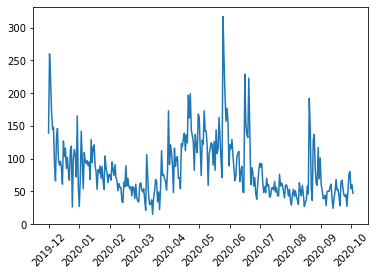

In [129]:
plt.plot(clients_minCreatedAt_count['date'],clients_minCreatedAt_count['new_clients_count_per_day'])
plt.xticks(rotation=45)
plt.show()

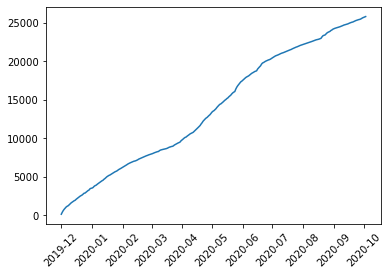

In [130]:
plt.plot(clients_minCreatedAt_count['date'],clients_minCreatedAt_count['new_clients_count_per_day'].cumsum())
plt.xticks(rotation=45)
plt.show()

### Q: clients unique per day evolution

In [134]:
transfers['customerId'].unique()

array(['5de2ffee6bad5850e5d3a0e3', '5d76f219cc8ccc0047caba8c',
       '5de304f06bad5850e5d3a269', ..., '5f767a687d69bc6a70f7b90f',
       '5f751fa0fec25b1b26c6b4d5', '5f6a478407f43f0084573585'],
      dtype=object)

In [135]:
transfers.head()

,id,total,customerId,createdAt,disorder,date
0,29261,50000.0,5de2ffee6bad5850e5d3a0e3,2019-12-01 00:00:26.899000+00:00,0,2019-12-01
1,29262,50000.0,5d76f219cc8ccc0047caba8c,2019-12-01 00:04:47.894000+00:00,0,2019-12-01
2,29263,50000.0,5de304f06bad5850e5d3a269,2019-12-01 00:11:39.676000+00:00,0,2019-12-01
3,29264,31000.0,5dd1628b3bea4b0060742232,2019-12-01 00:13:25.523000+00:00,0,2019-12-01
4,29265,30000.0,5dd0adca3bea4b0060741da7,2019-12-01 00:13:57.747000+00:00,0,2019-12-01


In [193]:
date_clts_agg1 = transfers.groupby(['date','customerId']).agg([np.sum])[['total']].reset_index()
date_clts_agg1 = date_clts_agg1.rename(columns={'total':'amount'})
date_clts_agg1.columns = date_clts_agg1.columns.get_level_values(0)
date_clts_agg2 = transfers.groupby(['date','customerId']).agg(['count'])[['total']].reset_index()
date_clts_agg2 = date_clts_agg2.rename(columns={'total':'volume'})
date_clts_agg2.columns = date_clts_agg2.columns.get_level_values(0)
date_clts_agg = pd.merge(date_clts_agg1,date_clts_agg2,how='left',on=['date','customerId'])
date_clts_agg.head()

,date,customerId,amount,volume
0,2019-12-01,5c538a696fc5fb0022f2b808,60000.0,1
1,2019-12-01,5c5f28cb9b3a5e001e368363,20000.0,1
2,2019-12-01,5c6082859b3a5e001e368412,46000.0,2
3,2019-12-01,5c61f8195bde67001ff88724,50000.0,1
4,2019-12-01,5c6c58195c5c32001f7db676,20000.0,1


In [144]:
date_clts_agg.corr()

,amount,volume
amount,1.000000,0.477575
volume,0.477575,1.000000


In [145]:
date_clts_agg.index

MultiIndex([(2019-12-01, '5c538a696fc5fb0022f2b808'),
            (2019-12-01, '5c5f28cb9b3a5e001e368363'),
            (2019-12-01, '5c6082859b3a5e001e368412'),
            (2019-12-01, '5c61f8195bde67001ff88724'),
            (2019-12-01, '5c6c58195c5c32001f7db676'),
            (2019-12-01, '5c6df852f705f3001ef62dcd'),
            (2019-12-01, '5c6ee315f705f3001ef62eb6'),
            (2019-12-01, '5c7566296d47f1002264c425'),
            (2019-12-01, '5c8442e07bbab8002131436f'),
            (2019-12-01, '5c8726e77bbab80021316a00'),
            ...
            (2020-10-03, '5f77cb6fa457cd787fc04b78'),
            (2020-10-03, '5f77d13e94eb6477e0e3ef0b'),
            (2020-10-03, '5f77d67e939f54006cc64a8f'),
            (2020-10-03, '5f78315332da9677f052c65e'),
            (2020-10-03, '5f788a5e607425783fbb80ef'),
            (2020-10-03, '5f789d7594b09f0073b964a6'),
            (2020-10-03, '5f78a1a6939f54006cd0b4ed'),
            (2020-10-03, '5f78afddd314d320cd772024'),
            

In [194]:
top1_clients

Index(['5e19e338580d530056bdcd03', '5de01ed59ce4780087fa1cc6',
       '5e1bb63ca7f353007914155f', '5e83cf16a88c16007db1b4b6',
       '5e233730797b000052a4ddfe', '5e190892459f6f0059f9a66c',
       '5e7a6d46d252e432e500df0f', '5e22131e825e6e0075621aee',
       '5d8d03b5d01c17005eaec768', '5e2b4d67bf3b7a00603e48d9',
       ...
       '5e39e06e57d578008640d9b8', '5dd6e1e972493500644064ef',
       '5dac3e5289d7fa005e29ac72', '5d07c9b16c4d13001f6ce4fc',
       '5e14dd368986c4007572c6a4', '5dc5f578b3090a008747cc00',
       '5e7e4470a87a42007cd212a6', '5e8500a0e08f60005de9b1fd',
       '5dc4cbc688d1e6006dd3ba5f', '5ec6cf4df5b36f72a1c179d2'],
      dtype='object', name='customerId', length=257)

In [204]:
len(top1_clients)

257

In [196]:
date_clts_agg_top1 = date_clts_agg[date_clts_agg['customerId'].isin(top1_clients)]
date_clts_agg_top1.head()

,date,customerId,amount,volume
7,2019-12-01,5c7566296d47f1002264c425,1039000.0,13
36,2019-12-01,5d71e138482db6004a28810b,50000.0,1
52,2019-12-01,5dab94851519d7007a5c4851,93500.0,1
62,2019-12-01,5db9bf3a9abf4d007cecff70,85000.0,1
64,2019-12-01,5dc168dad77631006b5b3557,188000.0,2


In [202]:
date_clts_agg_top1.corr()

,amount,volume
amount,1.000000,0.481547
volume,0.481547,1.000000


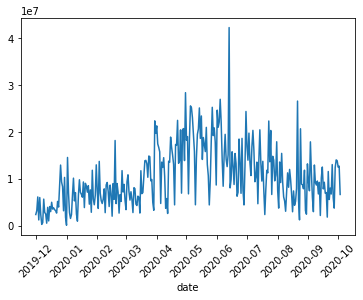

In [208]:
date_clts_agg_top1.groupby('date').agg(np.sum)['amount'].plot()
plt.xticks(rotation=45)
plt.show()

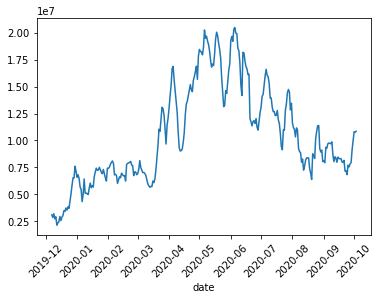

In [212]:
(date_clts_agg_top1.groupby('date').agg(np.sum)['amount'].rolling(7).mean()).plot()
plt.xticks(rotation=45)
plt.show()

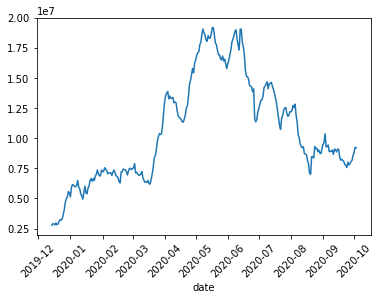

In [213]:
(date_clts_agg_top1.groupby('date').agg(np.sum)['amount'].rolling(14).mean()).plot()
plt.xticks(rotation=45)
plt.show()

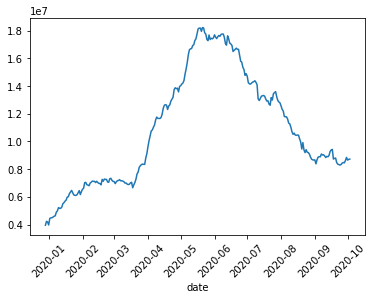

In [214]:
(date_clts_agg_top1.groupby('date').agg(np.sum)['amount'].rolling(28).mean()).plot()
plt.xticks(rotation=45)
plt.show()

In [199]:
date_clts_agg_top1.groupby('date').agg(np.sum)['amount']

date
2019-12-01    2.389500e+06
2019-12-02    3.209765e+06
2019-12-03    6.143723e+06
2019-12-04    1.231000e+06
2019-12-05    6.013580e+06
                  ...     
2020-09-29    1.406361e+07
2020-09-30    1.387850e+07
2020-10-01    1.250603e+07
2020-10-02    1.272111e+07
2020-10-03    6.675000e+06
Name: amount, Length: 307, dtype: float64

In [216]:
date_clts_agg_top1.head()

,date,customerId,amount,volume
7,2019-12-01,5c7566296d47f1002264c425,1039000.0,13
36,2019-12-01,5d71e138482db6004a28810b,50000.0,1
52,2019-12-01,5dab94851519d7007a5c4851,93500.0,1
62,2019-12-01,5db9bf3a9abf4d007cecff70,85000.0,1
64,2019-12-01,5dc168dad77631006b5b3557,188000.0,2


In [221]:
### option 1: pivot table customerId --> amount
### option 2: ont-hot-encoding customerId --> amount
### option 3: mean-encoding customerId

In [228]:
top1_amount_pivot = date_clts_agg_top1.pivot_table(index='date',columns=['customerId'],values='amount',fill_value=0)
top1_amount_pivot.head()

customerId,5c5c4e884cc399001ea482d3,5c6da80afb612c001ec631fe,5c7566296d47f1002264c425,5c756ed26d47f1002264c457,5c86799c7bbab8002131515f,5d07c9b16c4d13001f6ce4fc,5d1fb72a052ef5003fe0a544,5d3ef5b58c1fbf0049e51e5d,5d3f12898c1fbf0049e54711,5d4c60150566d300493c8254,...,5ec6cc920d3c1b731ed585a8,5ec6cf4df5b36f72a1c179d2,5ec846add8e67e3057f05cdb,5eded30d5019ef76b15c610a,5edef77d1ff0ec1d820b0cd1,5efb6e2c55d2e023e2673c79,5f04cf97d4866272caf2db30,5f0655dea266241a58af34ea,5f510f3e86fad30084feb2e3,5f6b683223f2a60079e16d3a
date,,,,,,,,,,,,,,,,,,,,,
2019-12-01,0,0,1039000,0,0,0.0,0.0,0,0.00,0,...,0.0,0,0,0.0,0.0,0,0.0,0.0,0.0,0
2019-12-02,0,0,595000,0,0,0.0,0.0,0,0.00,0,...,0.0,0,0,0.0,0.0,0,0.0,0.0,0.0,0
2019-12-03,0,0,374000,0,0,0.0,70000.0,0,50000.00,0,...,0.0,0,0,0.0,0.0,0,0.0,0.0,0.0,0
2019-12-04,0,70000,90000,0,0,0.0,0.0,0,0.00,0,...,0.0,0,0,0.0,0.0,0,0.0,0.0,0.0,0
2019-12-05,0,0,80000,0,0,0.0,0.0,0,599999.99,0,...,0.0,0,0,0.0,0.0,0,0.0,0.0,0.0,0
